In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df=pd.read_csv("spam_ham_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [6]:
df.shape

(5171, 4)

## Data cleaning

In [7]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [9]:
df.drop('label_num', axis=1,inplace=True)

In [10]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [11]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

## EDA

<Axes: ylabel='label'>

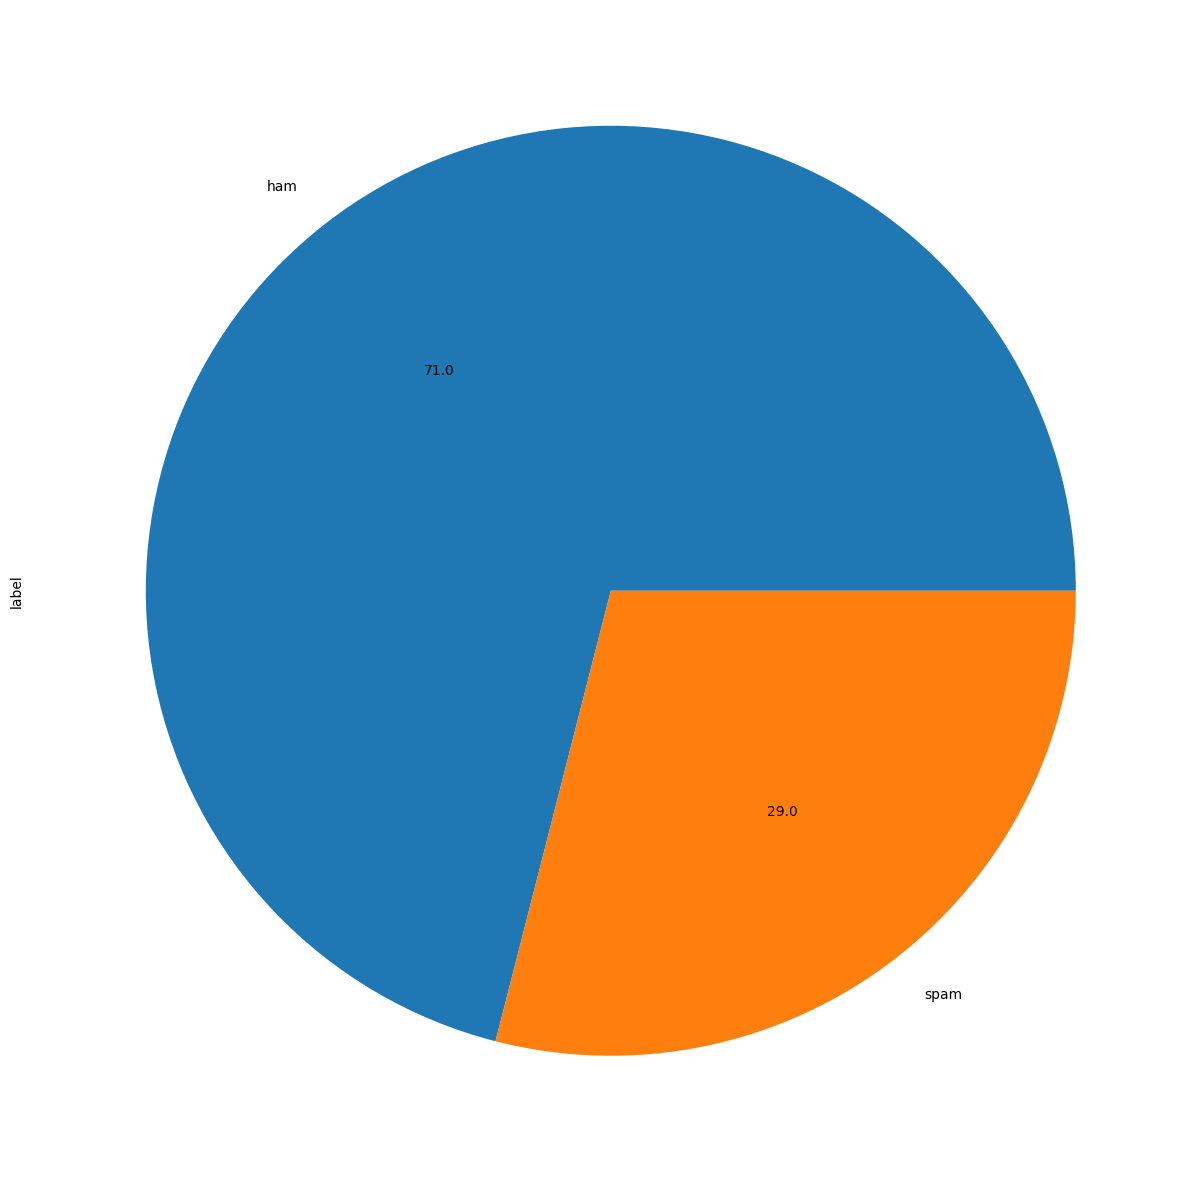

In [12]:
df['label'].value_counts().plot.pie(y=df['label'],figsize=(15,16),autopct='%1.1f')

## percentage of spam mail is less comparision to ham mail

In [13]:
df.duplicated().sum()

178

In [14]:
df.drop_duplicates()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch..."
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169,ham,Subject: industrial worksheets for august 2000...


In [15]:
df['label']=df['label'].map({'ham':0,'spam':1})


In [16]:
df.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [17]:
x=df['label']


In [18]:
y=df['text']

In [19]:
x

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label, Length: 5171, dtype: int64

In [20]:
y

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [21]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5171,)
(3619,)
(1552,)


In [23]:
extraction_feature=TfidfVectorizer(min_df=1,stop_words='english')

In [24]:
y_pred_train=extraction_feature.fit_transform(y_train)


In [25]:
y_pred_test=extraction_feature.transform(y_test)

In [26]:
print(y_pred_train)

  (0, 25394)	0.15812216772234342
  (0, 18745)	0.1355940621521847
  (0, 26163)	0.14864449252689266
  (0, 786)	0.21182869705958737
  (0, 7626)	0.1904575491876663
  (0, 1747)	0.23907840722970122
  (0, 12951)	0.09099930018976894
  (0, 1327)	0.21795525330456256
  (0, 306)	0.09965711295326055
  (0, 0)	0.1947040037169483
  (0, 218)	0.08574627293120081
  (0, 30208)	0.28579958594748234
  (0, 5615)	0.5500707718518907
  (0, 30293)	0.15454400042650585
  (0, 18978)	0.1405814236316845
  (0, 24293)	0.1755401106189524
  (0, 9950)	0.2279703921342901
  (0, 30204)	0.2210318056784917
  (0, 39874)	0.18103855460857352
  (0, 9954)	0.1352100233747555
  (0, 16872)	0.15387191747773038
  (0, 13276)	0.16170457755682316
  (0, 36604)	0.15387191747773038
  (0, 35724)	0.03360302727065303
  (1, 17932)	0.019418268185908676
  :	:
  (3618, 25558)	0.20460969834305986
  (3618, 23799)	0.1443281922523964
  (3618, 12874)	0.05323306823236722
  (3618, 23445)	0.17687419507856342
  (3618, 4791)	0.3317212548639669
  (3618, 9681)	0

In [27]:
print(y_pred_test)

  (0, 40466)	0.343723509655214
  (0, 35724)	0.05084518718822478
  (0, 27150)	0.1643938777318726
  (0, 24907)	0.19683287126094454
  (0, 20391)	0.4959176374786724
  (0, 20386)	0.1302099926357827
  (0, 17075)	0.16792055725832303
  (0, 6272)	0.1418072701231029
  (0, 1509)	0.6741339596931534
  (0, 1379)	0.16196307886212344
  (0, 932)	0.14702446845721814
  (1, 41119)	0.0051555798796057055
  (1, 40936)	0.08872562954657198
  (1, 39895)	0.06912163085812514
  (1, 39480)	0.08149126584267272
  (1, 39269)	0.09555067797323137
  (1, 38897)	0.0040301533947974585
  (1, 38782)	0.08872562954657198
  (1, 38652)	0.09555067797323137
  (1, 38111)	0.09555067797323137
  (1, 37871)	0.08449379806321271
  (1, 37623)	0.07302760287595414
  (1, 37441)	0.05055757122181441
  (1, 37209)	0.003751244108879559
  (1, 37174)	0.08872562954657198
  :	:
  (1551, 20424)	0.12618463773841093
  (1551, 18368)	0.22308762419749747
  (1551, 18182)	0.16818303682220984
  (1551, 18156)	0.14034798462977258
  (1551, 17530)	0.18728381165157

## model training

In [28]:
LR=LogisticRegression()

In [29]:
LR.fit(y_pred_train,x_train)

LogisticRegression()

In [30]:
prediction=LR.predict(y_pred_test)

In [31]:
# accuracy
print(accuracy_score(x_test,prediction))

0.9896907216494846


## model give 98% accuracy 

In [32]:
mail=["assignment deadline has end"]
prd=extraction_feature.transform( mail )
f_prediction=LR.predict(prd)
print(f_prediction)
if(f_prediction[0]==1):
    print("the mail is spam")
else:
    print("the mail is ham")

[0]
the mail is ham
